# Statistics Assignment #5 - iPhone vs Android Internet Speed
Nick Crawford, December 1, 2016

In [204]:
%matplotlib inline
import pandas as pd
import seaborn as sns
import numpy as np
import scipy as sp
import scipy.stats

idata = pd.read_csv('IPHONE_data.csv', encoding="utf-8-sig")
adata = pd.read_csv('ANDROID_data.csv', encoding="utf-8-sig")
pd.set_option('display.max_columns', None)

# Convert timestamp columns from string into python datetime objects.
idata['test_date'] = pd.to_datetime(idata['test_date'])
adata['test_date'] = pd.to_datetime(adata['test_date'])

In [205]:
adata

,test_id,android_device_id,android_fingerprint,test_date,client_ip_address,download_kbps,upload_kbps,latency,server_name,server_country,server_country_code,server_latitude,server_longitude,server_sponsor_name,client_country,client_country_code,client_region_name,client_region_code,client_city,client_latitude,client_longitude,miles_between,connection_type,isp_name,is_isp,network_operator_name,network_operator,brand,device,hardware,build_id,manufacturer,model,product,cdma_cell_id,gsm_cell_id,location_type,sim_network_operator_name,sim_network_operator_code
0,2258425023,134236317,Micromax/E483/E483:5.1.1/LMY47V/1432893370:use...,2016-10-01 00:00:00,49.32.xxx.xxx,1073,987,59,New Delhi,India,IN,28.6100,77.2300,Gigantic Infotel Pvt Ltd,India,IN,Haryana,HR,Panipat,29.3889,76.9681,56.158300,15,Reliance Jio Infocomm Ltd,1,Jio 4G,405858,Micromax,E483,qcom,LMY47V,Micromax,Micromax E483,E483,NaN,51761.0,2,Jio 4G,405858.0
1,2258425024,100338676,asus/WW_Z00A/Z00A:5.0/LRX21V/2.20.40.196_20160...,2016-10-01 00:00:00,114.136.xxx.xxx,43087,25143,18,Taipei,Taiwan,TW,25.0333,121.5333,Chief Telecom,Taiwan,TW,Unknown,??,Taipei,25.0392,121.5250,0.661170,15,Chunghwa Telecom Co.,0,中華電信,46692,asus,Z00A,mofd_v1,MMB29P,asus,ASUS_Z00AD,WW_Z00A,NaN,54530573.0,2,NaN,46692.0
2,2258425025,136226750,vivo/V3/V3:5.1.1/LMY47V/compiler08301843:user/...,2016-10-01 00:00:00,106.216.xxx.xxx,17777,1735,38,Mysore,India,IN,12.3000,76.6500,North East Dataa Network Pvt Ltd,India,IN,Karnataka,KA,Mangalore,12.8873,74.8441,128.499000,15,BHARTI Airtel,1,TATA DOCOMO,405034,vivo,V3,qcom,LMY47V,vivo,vivo V3,V3,NaN,17391.0,1,AIRCEL,40445.0
3,2258425026,136150649,Lenovo/k5fpr/A7010a48:6.0/MRA58K/RA7010a48_S21...,2016-10-01 00:00:00,157.49.xxx.xxx,5195,6704,112,Bangalore,India,in,12.9833,77.5833,Bell Teleservices Private Limited,India,IN,Karnataka,KA,Bengaluru,12.9833,77.5833,0.000000,15,Reliance Jio Infocomm Limited,1,Jio 4G,405861,Lenovo,A7010a48,mt6735,MRA58K,LENOVO,Lenovo A7010a48,k5fpr,NaN,872209.0,2,Jio 4G,405861.0
4,2258425027,133772702,LYF/LS-4503/LS-4503:5.1.1/LMY47V/8229d68:user/...,2016-10-01 00:00:00,47.247.xxx.xxx,80,2965,298,Indore,India,IN,22.7287,75.8654,RAJESH PATEL NET SERVICES (P) LTD,India,IN,Madhya Pradesh,MP,Indore,22.7167,75.8333,2.210140,15,Reliance Jio Infocomm Limited,1,Jio 4G,405863,LYF,LS-4503,qcom,LMY47V,unknown,LS-4503,LS-4503,NaN,85521.0,2,Jio 4G,405863.0
5,2258425028,78901170,lge/p1_global_com/p1:6.0/MRA58K/1620215065b6f:...,2016-10-01 00:00:00,109.173.xxx.xxx,35643,1616,8,Poznan,Poland,PL,52.2400,16.9167,Orange Polska S.A.,Poland,PL,Greater Poland Voivodeship,WP,Mosina,52.2291,16.8520,2.842720,2,Inea,1,Plus,26001,lge,p1,p1,MRA58K,LGE,LG-H815,p1_global_com,NaN,8208901.0,1,,26001.0
6,2258425029,76778487,Xiaomi/cancro_wc_lte/cancro:6.0.1/MMB29M/V8.0....,2016-10-01 00:00:00,59.94.xxx.xxx,879,80,331,Balasore,India,IN,21.3469,86.6611,JetSpot Networks,India,IN,Odisha,OR,Balasore,21.4971,86.9231,19.813100,2,BSNL,1,BSNL MOBILE,40476,Xiaomi,cancro,qcom,MMB29M,Xiaomi,MI 4W,cancro_wc_lte,NaN,118433714.0,1,BSNL MOBILE,40476.0
7,2258425030,134611989,Xiaomi/ferrari/ferrari:5.0.2/LRX22G/V8.0.1.0.L...,2016-10-01 00:00:00,49.32.xxx.xxx,619,304,637,Lahore,Pakistan,PK,31.5758,74.3269,Waridtel Pvt Ltd,India,IN,Punjab,PB,Jalandhar,31.3332,75.6090,77.490200,15,Reliance Jio Infocomm Ltd,1,Jio 4G,405867,Xiaomi,ferrari,qcom,LRX22G,Xiaomi,Mi 4i,ferrari,NaN,1030161.0,1,Jio 4G,405867.0
8,2258425031,131014202,ZTE/P816A06/xuantan:5.1/LMY47O/20151015.161210...,2016-10-01 00:00:00,190.124.xxx.xxx,9543,5135,11,San Pedro Sula,Honduras,HN,15.5194,-88.0306,Reytel,Honduras,HN,Santa Barbara,SB,Pinalejo,15.3833,-88.4000,26.365900,2,AsiNetwork,1,Claro HND,708001,ZTE,xuantan,qcom,LMY47O,ZTE,Z812,P816A06,NaN,26416242.0,2,Claro HND,708001.0
9,2258425032,124735621,samsung/j7e3gxx/j7e3g:6.0.1/MMB29K/J700HXXU2BP...,2016-10-01 00:00:00,91.196.xxx.xxx,3662,438,12,Zhytomyr,Ukraine,UA,50.2667,28.6667,dks.com.ua,Ukraine,UA,Zhytomyrs'ka oblast,18,Zhytomyr,50.2649,28.6767,0.459371,2,Vedekon Ltd,1,DJUI

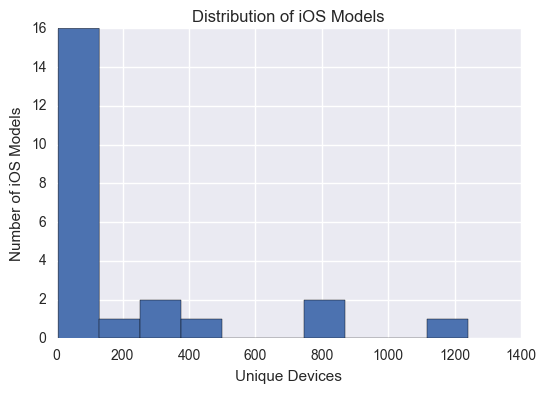

In [206]:
plot1 =idata["model"].value_counts().hist()
plot1.set_title("Distribution of iOS Models")
plot1.set_xlabel("Unique Devices")
plot1.set_ylabel("Number of iOS Models")

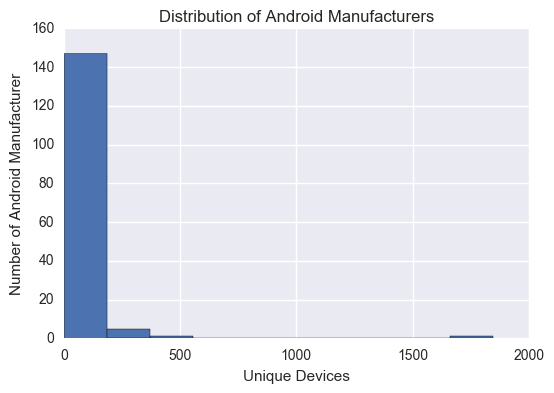

In [207]:
# for every value in manufacturer column, make lowercase
plot2 = adata.manufacturer.str.lower().value_counts().hist()
plot2.set_title("Distribution of Android Manufacturers")
plot2.set_xlabel("Unique Devices")
plot2.set_ylabel("Number of Android Manufacturer")

In [208]:
#mean download speed for all devices
average = (idata.download_kbps.mean() + adata.download_kbps.mean()) / 2
print("Average of iOS and Android download speeds is {}kbps"
     .format(average))

Average of iOS and Android download speeds is 20187.4209kbps


In [288]:
# mean download speeds for all devices, by country
a=adata.groupby("client_country")["download_kbps"].mean()
i=idata.groupby("client_country")["download_kbps"].mean()


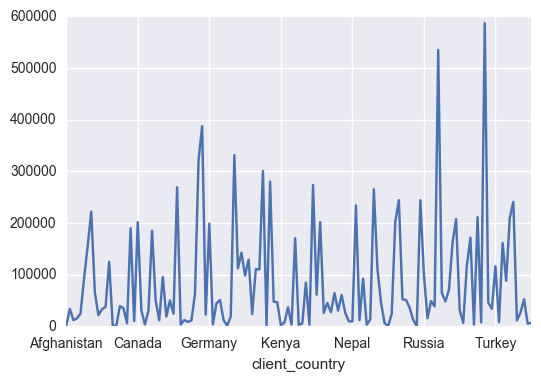

In [292]:
# merge 2 data frames
z=pd.concat([adata,idata])

z1=z.groupby("client_country")["download_kbps"].max()
z1.plot()

In [210]:
def mean_confidence_interval(data, confidence=0.95):
    a = 1.0*np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * sp.stats.t._ppf((1+confidence)/2., n-1)
    return m, m-h, m+h

In [231]:
filtered = idata[idata.client_country=="United States"]
ci1 = mean_confidence_interval(filtered.download_kbps, 0.90)

print("90% confidence interval for download speeds on iOS in US \n{} - {}"
     .format(ci1[1], ci1[2]))

90% confidence interval for download speeds on iOS in US 
41622.76993609106 - 48561.398530431616


In [235]:
filtered2 = adata[adata.client_country=="United Kingdom"]
ci2 = mean_confidence_interval(filtered.download_kbps, 0.95)

print("95% confidence interval for download speeds on Android in the United Kingdom \n{} - {}"
     .format(ci2[1], ci2[2]))

95% confidence interval for download speeds on Android in the United Kingdom 
40955.59416907168 - 49228.574297451


In [276]:
#99 confidence for stdev of network latency in mexico on android using chi-squared interval

In [ ]:
stats.ttest_ind(a= minnesota_ages,
                b= wisconsin_ages,
                equal_var=False)    # Assume samples have equal variance?